# Code

## Problem Statement
### Given the image of Lena, the goal of the assignment is to enlarge the image by a factor of k (where k = (k = 2, 2.5, 3.0,3.5, 4.0 along both dimensions) using the following interpolation techniques:
#### 1. Nearest Neighbor interpolation
#### 2. Bilinear interpolation

# 0. Replicate the image

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def replicate(x):
    m,n = x.shape
    x1 = np.zeros(shape=(2*m,2*n),dtype='uint8')
    for i in range(m):
        ii = 2*i
        for j in range(n):
            jj = 2*j
            x1[ii,jj] = x[i,j]
            x1[ii,jj+1] = x[i,j]
            x1[ii+1,jj] = x[i,j]
            x1[ii+1,jj+1] = x[i,j]
    return x1

# 1. NN interpolation

In [3]:
def nninterp(x,k):
    
    (m,n) = x.shape
    
    m1 = np.uint16(m*k)
    n1 = np.uint16(n*k)
    
    n1 = np.uint16(n*k)
    x1 = np.zeros(shape=(m1,n1),dtype = 'uint8')
    
    for i in range(0,m1):
        for j in range(0,n1):
            ii = np.uint16(np.floor(i*1.0/k+0.5))
            if(ii == m):
                ii = ii-1
            jj = np.uint16(np.floor(j*1.0/k+0.5))
            if(jj == n):
                jj = jj-1
            x1[i,j] = x[ii,jj]
    return x1

# 2. Bilinear Interpolation

In [4]:
def bilinear(x,i1,j1): #x input image i1 and j1 are floating point number where pixel value is returned to the calling function
    (m,n) = x.shape
    i0 = np.uint16(np.floor(i1))
    j0 = np.uint16(np.floor(j1))
    if(i0 == m-1):
        i0 = i0-1
    if(j0 == n-1):
        j0 = j0-1
    g1 = np.float(x[i0,j0])
    g2 = np.float(x[i0,j0+1])
    g3 = np.float(x[i0+1,j0])
    g4 = np.float(x[i0+1,j0+1])
    gp = g1+(g2-g1)*(j1-j0)
    gpp = g3+(g4-g3)*(j1-j0)
    g = gp+(gpp-gp)*(i1-i0)
    return np.uint8(g)
    

In [5]:
def bilinearinterp(x,k): # x is input image and k is zoom factor(float)
    (m,n) = x.shape
    m1 = np.uint16(m*k)
    n1 = np.uint16(n*k)
    x1 = np.ndarray(shape=(m1,n1),dtype='uint8')
    for i in range(0,m1):
        i1 = i*1.0/k
        for j in range(0,n1):
            j1 = j*1.0/k
            x1[i,j] = bilinear(x,i1,j1)
    return x1

# Main

In [13]:
 def main():   
    
    xx = plt.imread('lena64.jpg')
    xx = xx[:,:,0]
    fig,ax0 = plt.subplots(1,1,figsize=(4,4))
    ax0.set_title('input image')
    ax0.imshow(xx,cmap='gray')
    
   
    k  = 2.0
    k2 = 2.5
    k3 = 3.0
    k4 = 3.5
    k5 = 4.0
   
    xx1 = replicate(replicate(xx))
    fig, ax1 = plt.subplots(1,1,figsize= (4,4))
    ax1.set_title('replicate')
    ax1.imshow(xx1,cmap='gray')
    
    
    xx2 = nninterp(xx,k)
    fig, ax2 = plt.subplots(1,1,figsize= (4,4))
    ax2.set_title('NN interpolation k = 2.0')
    ax2.imshow(xx2,cmap='gray')
    
    xx3 = bilinearinterp(xx,k)
    fig, ax3 = plt.subplots(1,1,figsize= (4,4))
    ax3.set_title('Bi-linear interpolation k = 2.0')
    ax3.imshow(xx3,cmap = 'gray')
    
    xx22 = nninterp(xx,k2)
    fig, ax22 = plt.subplots(1,1,figsize= (4,4))
    ax22.set_title('NN interpolation k = 2.5')
    ax22.imshow(xx22,cmap='gray')
    
    xx32 = bilinearinterp(xx,k2)
    fig, ax32 = plt.subplots(1,1,figsize= (4,4))
    ax32.set_title('Bi-linear interpolation k= 2.5')
    ax32.imshow(xx32,cmap = 'gray')
    
    xx23 = nninterp(xx,k3)
    fig, ax23 = plt.subplots(1,1,figsize= (4,4))
    ax23.set_title('NN interpolation k = 3.0')
    ax23.imshow(xx23,cmap='gray')
    
    xx33 = bilinearinterp(xx,k3)
    fig, ax33 = plt.subplots(1,1,figsize= (4,4))
    ax33.set_title('Bi-linear interpolation k = 3.0')
    ax33.imshow(xx33,cmap = 'gray')
    
    xx24 = nninterp(xx,k4)
    fig, ax24 = plt.subplots(1,1,figsize= (4,4))
    ax24.set_title('NN interpolation k = 3.5')
    ax24.imshow(xx24,cmap='gray')
    
    xx34 = bilinearinterp(xx,k4)
    fig, ax34 = plt.subplots(1,1,figsize= (4,4))
    ax34.set_title('Bi-linear interpolation k = 3.5')
    ax34.imshow(xx34,cmap = 'gray')
    
    xx25 = nninterp(xx,k5)
    fig, ax25 = plt.subplots(1,1,figsize= (4,4))
    ax25.set_title('NN interpolation k = 4.0')
    ax25.imshow(xx25,cmap='gray')
    
    xx35 = bilinearinterp(xx,k5)
    fig, ax35 = plt.subplots(1,1,figsize= (4,4))
    ax35.set_title('Bi-linear interpolation k = 4.0')
    ax35.imshow(xx35,cmap = 'gray')
    
    plt.show()

# Results

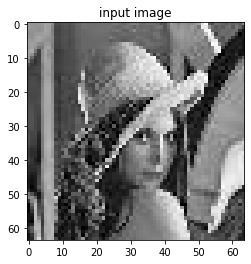

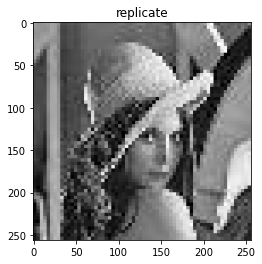

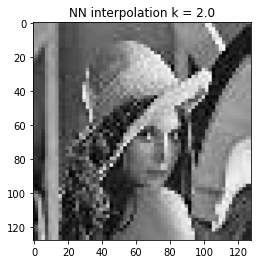

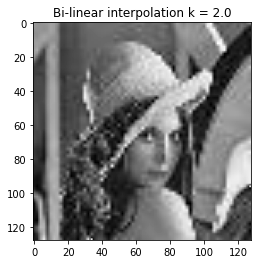

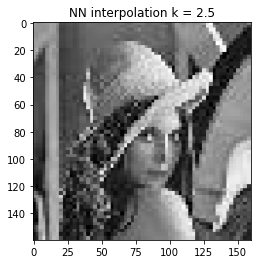

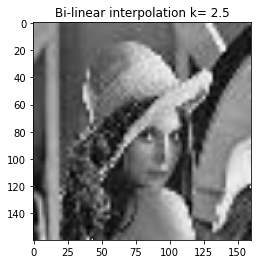

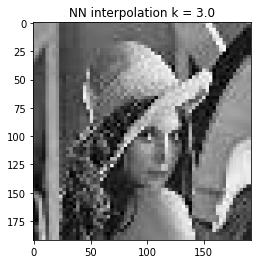

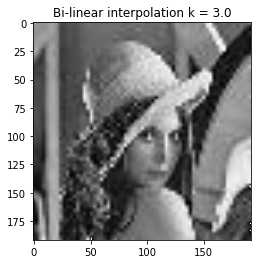

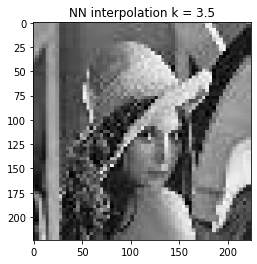

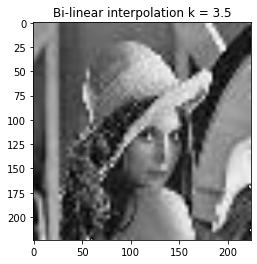

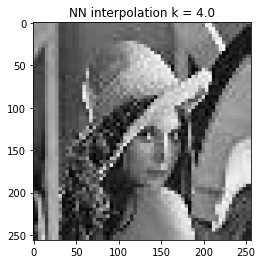

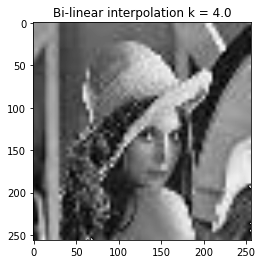

In [14]:
if __name__=='__main__':
    main()